In [1]:
import pandas as pd
df=pd.read_csv("delivery_time.csv")
df.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [2]:
df.tail()

,DeliveryTime,SortingTime
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [3]:
df

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


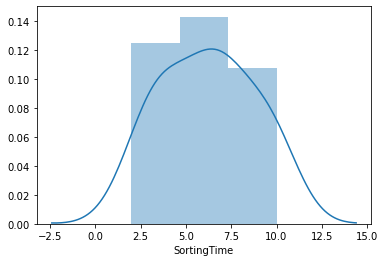

In [6]:
import seaborn as sns
sns.distplot(df['SortingTime'])

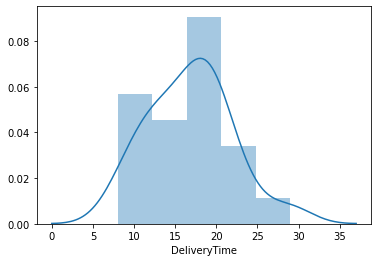

In [7]:
import seaborn as sns
sns.distplot(df['DeliveryTime'])

In [8]:
df=pd.read_csv("delivery_time.csv")
df

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
import statsmodels.formula.api as smf
model = smf.ols("SortingTime~DeliveryTime",data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           3.98e-06
Time:                        19:30:00   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7567      1.134     -0.667      0.513      -3.130       1.617
DeliveryTime     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

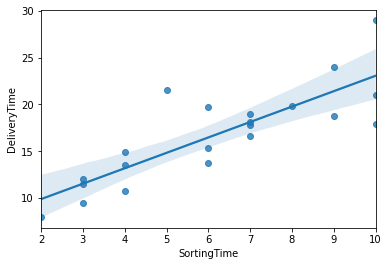

In [10]:
sns.regplot(x="SortingTime", y="DeliveryTime", data=df);

In [11]:
model.params

Intercept      -0.756673
DeliveryTime    0.413744
dtype: float64

In [12]:
model.resid
model.resid_pearson

array([ 1.40674689, -0.56381619, -0.9623592 , -0.11779731, -0.8447675 ,
        0.27597371, -0.07105342, -0.1182853 ,  2.27920872,  1.35975901,
        0.37557826,  0.21014188,  0.58188575, -0.6811639 , -0.83032673,
       -0.95220243,  0.72627659,  0.17942755, -0.37635266,  0.25823056,
       -2.13510428])

In [13]:
pred = model.predict(df.iloc[:,0])
pred
pd.set_option("display.max_rows", None) 
pred
rmse_lin = np.sqrt(np.mean((np.array(df['DeliveryTime'])-np.array(pred))**2))
rmse_lin 

10.990921514737984

In [14]:
model1 = smf.ols("SortingTime~np.log(DeliveryTime)",data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           1.59e-06
Time:                        19:30:43   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(DeliveryTime)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model2 = smf.ols(("np.log(SortingTime)~DeliveryTime"),data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(SortingTime)   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.679
Method:                  Least Squares   F-statistic:                     43.39
Date:                 Sat, 02 Jan 2021   Prob (F-statistic):           2.64e-06
Time:                         19:30:51   Log-Likelihood:               -0.85600
No. Observations:                   21   AIC:                             5.712
Df Residuals:                       19   BIC:                             7.801
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4372      0.204      2.139      0.046       0.009       0.865
DeliveryTime     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
df['deli_sq']=df.DeliveryTime*df.DeliveryTime
df.shape

(21, 3)

In [19]:
model3=smf.ols("SortingTime~deli_sq",data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     28.82
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           3.52e-05
Time:                        19:36:44   Log-Likelihood:                -39.186
No. Observations:                  21   AIC:                             82.37
Df Residuals:                      19   BIC:                             84.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8658      0.716      4.004      0.001       1.368       4.364
deli_sq        0.0108      0.002      5.368      0.000       0.007       0.015
==============================================================================
Omnibus:                        0.933   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.627   Jarque-Bera (JB):                0.652
Skew:                           0.413   Prob(JB):                        0.722
Kurtosis:                       2.749   Cond. No.                         707.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
new_data=pd.DataFrame({'DeliveryTime':25},index=[1])

In [21]:
model.predict(new_data)

1    9.586917
dtype: float64

In [22]:
pred_y=model1.predict(df)

In [23]:
pred_y

0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

In [25]:
new_data=pd.DataFrame({'DeliveryTime':30},index=[1])

In [26]:
model1.predict(new_data)

1    10.409697
dtype: float64